In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# To plot graph of matplotlib and seaborn library inline
%matplotlib inline

In [38]:
mark_df = pd.read_excel('marks.xlsx')

In [39]:
mark_df.tail()

,science,maths,skill
72,71,66,1
73,72,55,1
74,73,77,2
75,74,80,2
76,80,90,2


In [40]:
bins = (-1, 0.5, 1.5, 2.5)
group_names = ['bad', 'average', 'good']
mark_df['skill'] = pd.cut(mark_df['skill'], bins=bins, labels=group_names)
mark_df['skill'].unique()

[average, good, bad]
Categories (3, object): [bad < average < good]

## Determine the skill of students with Label Encoder()

In [41]:
label_quality = LabelEncoder()

In [42]:
mark_df['skill'] = label_quality.fit_transform(mark_df['skill'])

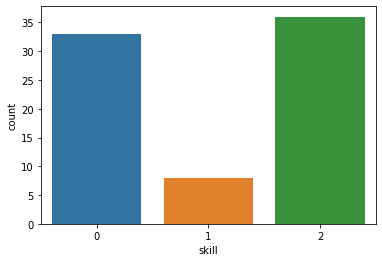

In [43]:
sns.countplot(mark_df['skill'])

##### Let's Seperate the skill of students as Reponse Variable and Feature Variable

In [44]:
X = mark_df.drop(['skill'], axis=1)
y = mark_df['skill']

#### Train and Splitting of data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

##### Applying Standard Scaler to Scale the Data

In [46]:
sc = StandardScaler()

In [47]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Random Forest Classifier

In [48]:
rfc = RandomForestClassifier(n_estimators=10000)

In [49]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [50]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.67      0.80         3
           2       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.96      0.89      0.91        16
weighted avg       0.94      0.94      0.93        16

[[5 0 0]
 [0 2 1]
 [0 0 8]]


### Support Vector Models

In [51]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [52]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.00      0.00      0.00         3
           2       0.89      1.00      0.94         8

    accuracy                           0.81        16
   macro avg       0.53      0.67      0.59        16
weighted avg       0.67      0.81      0.73        16

[[5 0 0]
 [2 0 1]
 [0 0 8]]


/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sandaru/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [56]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.67      0.80         3
           2       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.96      0.89      0.91        16
weighted avg       0.94      0.94      0.93        16

[[5 0 0]
 [0 2 1]
 [0 0 8]]


## Let's Score

In [58]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.9375

In [72]:
print(mark_df.tail())
Xnew = [[73, 77]]
Xnew = sc.fit_transform(Xnew)
pred = mlpc.predict(Xnew)
pred

    science  maths  skill
72       71     66      0
73       72     55      0
74       73     77      2
75       74     80      2
76       80     90      2


array([0])